In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generating data

In [2]:
# Data
x = np.append(np.random.randn(1000, 1),
              .4*np.random.randn(1000, 1), axis=1)

# rotation matrix
th = np.pi/4;
R1 = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])

# rotate data to induce correlation
y = x@R1;

### Performing PCA

In [3]:
# PCA of y (correlated data)
y = y - y.mean(axis=0)

cov_mat = y.T@y / (len(y)-1);

eig_val, eig_vec = np.linalg.eig(cov_mat)

### Compute quadratic form

In [4]:
xi = np.arange(-2, 2, 0.1)

N = len(xi)

quad_form = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        # define vector
        x = np.array([xi[i], xi[j]]).T

        quad_form[i, j] = x.T@cov_mat@x / (x.T@x)

quad_form = np.nan_to_num(quad_form)

### Plot the data

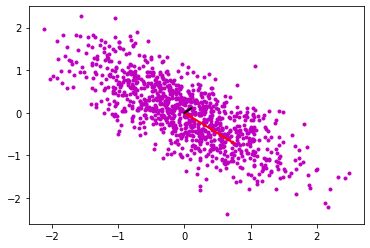

In [5]:
plt.plot(y[:, 0], y[:, 1], 'm.')
plt.plot([0, eig_vec[0, 0]*eig_val[0]], [0, eig_vec[1, 0]*eig_val[0]], 'r', linewidth=2)
plt.plot([0, eig_vec[0, 1]*eig_val[1]], [0, eig_vec[1, 1]*eig_val[1]], 'k', linewidth=2)
plt.show()

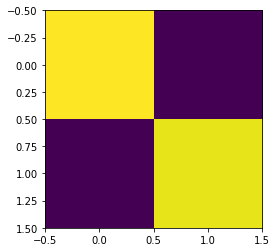

In [6]:
plt.imshow(cov_mat)
plt.show()

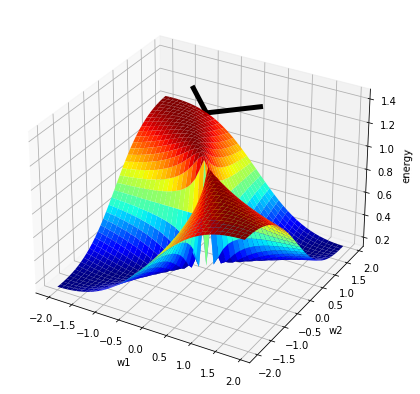

In [7]:
X, Y = np.meshgrid(xi, xi)

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, quad_form, cmap='jet')

qf_max = quad_form.max()
qf_max *= 1.4
ax.plot([0, eig_vec[0, 0]], [0, eig_vec[0, 1]], np.array([qf_max, qf_max]), 'k', linewidth=5)
ax.plot([0, eig_vec[1, 0]], [0, eig_vec[1, 1]], [qf_max, qf_max], 'k', linewidth=5)

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('energy')
plt.show()